# Chapter 9 - Unsupervised Learning

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs()

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
X.shape

(100, 2)

In [6]:
X[0]

array([-5.85638465,  6.13356111])

In [7]:
X[:,0]

array([-5.85638465, -7.26379305, -7.18104541, -3.25560788, -6.71850471,
        4.04154107, -5.87750317, -6.65530585, -2.85321511, -4.81274071,
       -8.30946693, -2.55993299, -6.60797467,  0.7723598 ,  2.92291328,
       -3.47547382, -6.48384678,  2.61035447, -2.67888228,  1.44044318,
       -9.27552332, -6.96386963, -6.1413549 , -5.42680142,  4.28110297,
        3.60822118, -6.98865927, -2.50262333, -4.20354437, -3.20739715,
       -4.6082692 ,  2.3263182 ,  2.72441021, -4.18229783, -4.98077744,
        3.46996317,  2.6898243 ,  2.99734905, -7.3603277 , -4.95876323,
        1.48707561, -2.71788499,  2.0965256 , -4.46579188,  2.795534  ,
       -6.75709446, -7.57564623,  3.45602965,  1.41272052,  3.17082616,
       -3.76339457, -4.83018722, -3.30206872,  2.37279388,  4.20027202,
       -4.04072282,  4.63422143, -8.15849248, -7.4089467 , -6.12255572,
       -9.0821546 , -3.45283961,  0.40468842,  3.10801641, -2.83777214,
       -3.34646881,  1.95767297, -3.77898209, -8.02062819, -7.04

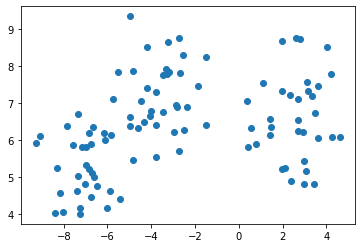

In [8]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

OK... acá veo claramente los blobs

In [9]:
# Clustering

from sklearn.cluster import KMeans
k=3
k_means = KMeans(n_clusters=k)
y_pred = k_means.fit_predict(X)

In [10]:
y_pred

array([1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2], dtype=int32)

In [11]:
y

array([1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2])

Notar que los separó perfectamente

In [12]:
k_means.cluster_centers_

array([[ 2.55241768,  6.61461128],
       [-7.11598994,  5.25061254],
       [-3.60270589,  7.19143293]])

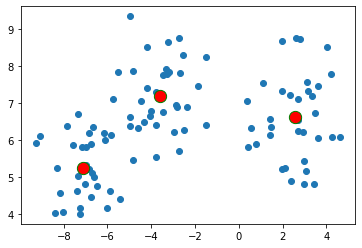

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="r", edgecolors="g", s=150)
plt.show()

Ahí se ven claramente los centroides de los 3 blobs

Con nuevas instancias, va a calcular a qué centroide se encuentra más próximo y va a predecir que la nueva instancia pertenece a ese cluster

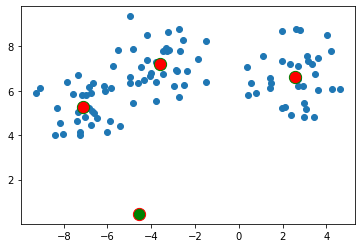

In [14]:
new_random_instance = (np.random.rand(2) - 0.5) * 10
new_random_instance

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="r", edgecolors="g", s=150)
plt.scatter(*new_random_instance, c="g", edgecolors="r", s=150)
plt.show()

In [15]:
print(new_random_instance)

[-4.56497824  0.4504902 ]


In [16]:
k_means.predict(new_random_instance.reshape(1, -1))

array([1], dtype=int32)

Se ve que pertence al cluster 0. (que tiene coordenadas [-5.68529026, -4.51281943])

In [17]:
list(map(lambda x: np.linalg.norm(x - new_random_instance), k_means.cluster_centers_))

[9.415610089447217, 5.435884028632485, 6.809278741252174]

Se ve que tiene menor distancia al centroide del cluster 0

In [18]:
# Otra forma de obtener las distancias a los centroides
k_means.transform(new_random_instance.reshape(1, -1))

array([[9.41561009, 5.43588403, 6.80927874]])

## Eligiendo el número correcto de clusters

In [19]:
inertias = []

for k in range(2, 8):
    kmc = KMeans(n_clusters=k)
    kmc.fit(X)
    inertias.append(kmc.inertia_)
    

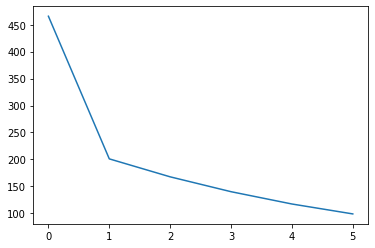

In [20]:
plt.figure()
plt.plot(inertias)
plt.show()

En este caso, en 3 clusters se ve el cambio de pendiente en la inertia! Entonces, 3 parece ser un buen número de clusters para elegir
(0 es 2, 1 es 3, 2 es 4, etc.)

### Otra forma (mejor, más fina) de medirlo, sería con el silhouette score

In [21]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means.labels_)

0.5996884941281112

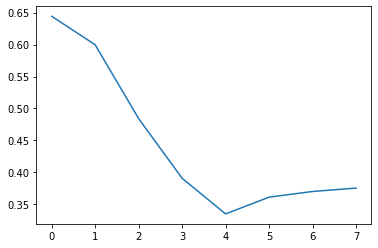

In [22]:
# Hago lo mismo que para el silhouette score
s_scores = []

for k in range(2, 10):
    kmc = KMeans(n_clusters=k)
    kmc.fit(X)
    s_scores.append(silhouette_score(X, kmc.labels_))
    
plt.figure()
plt.plot(s_scores)
plt.show()

The higher, the better. Se ve que 3 clusters sería lo ideal.

## Clustering for Pre-Processing

In [23]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/panza/Desktop/Panza/Projects/virtual_envs/ho-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
log_reg.score(X_test, y_test)

0.9711111111111111

Ok... 96.4 % Accuracy. (baseline)
### Now, let's apply clusterring for preprocessing
We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model:

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=54)),  # Esto separa en 50 clusters y reemplaza cada imagen por la distancia al centroide del cluster más cercano
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

/home/panza/Desktop/Panza/Projects/virtual_envs/ho-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=54)),
                ('log_reg', LogisticRegression())])

In [28]:
pipeline.score(X_test, y_test)

0.9644444444444444

OK... it performed slightly worse... But the general idea is that it should perform better...

In [29]:
# Searching for an optimum number of clusters
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(10, 81, 5))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=False)
grid_clf.fit(X_train, y_train)

/home/panza/Desktop/Panza/Projects/virtual_envs/ho-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/panza/Desktop/Panza/Projects/virtual_envs/ho-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=54)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(10, 81, 5)},
             verbose=False)

In [30]:
grid_clf.best_params_

{'kmeans__n_clusters': 55}

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [32]:
dbscan.labels_

array([ 5,  0,  1,  2,  3,  0,  1,  4,  4,  2,  1,  0,  0,  0,  5,  6,  6,
        0,  6,  7,  0,  0,  0,  0,  7,  0,  0,  1,  7,  2,  1,  0,  0,  1,
        0, -1,  3,  1,  3,  0,  7,  1,  2,  2,  0,  1,  0,  2,  0,  6,  2,
        1,  7,  5,  0,  6, -1,  7,  0,  0,  1,  1,  1,  0,  1,  0,  5,  0,
        1,  0,  8,  2,  7, -1,  0,  1,  1,  6, -1,  2,  5,  7,  2,  0,  0,
        6, -1,  7, -1,  2,  1,  1,  2,  7,  1,  2,  2,  1,  5,  3,  1,  1,
        1,  1,  7,  7,  0,  3,  0,  1,  2,  6,  0,  6,  6,  0,  2,  0,  1,
        6,  0,  0,  8,  1,  0,  0,  0,  4,  1,  0,  0, -1,  0,  6,  0,  0,
        0,  7,  1,  2,  0,  2,  6,  6,  0,  2,  8,  0, -1,  2,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  2, -1,  2,  0,  1,  2,  1,  7, -1,  0, -1,
        6,  0,  0,  0,  6,  1,  0,  1,  1,  6, -1, -1,  2,  0,  1,  3,  8,
        0,  6,  0,  0,  1,  0,  0,  3,  6,  7,  0,  5,  2,  0,  0,  0,  1,
        0,  1,  2,  1,  1,  0,  6,  0,  0, -1,  0,  0,  2,  6,  4,  7,  1,
        0,  0,  0,  0,  0

-1 means anomaly... Encontró 9 Clusters distintos... Not great... Pero si varío el epsilon...

In [33]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
dbscan.labels_

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,

Encontró solo 2 clusters!! Exito!

# Gaussian Mixture Models

In [34]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [35]:
gm.weights_

array([0.60869708, 0.1997239 , 0.19157902])

In [36]:
gm.means_

array([[ 0.48553866,  0.2575485 ],
       [ 1.75011195, -0.05100488],
       [-0.77178448,  0.53277386]])

In [37]:
gm.covariances_

array([[[ 0.1786037 , -0.11286149],
        [-0.11286149,  0.29588784]],

       [[ 0.05051294,  0.05977685],
        [ 0.05977685,  0.08585126]],

       [[ 0.04055027,  0.05352814],
        [ 0.05352814,  0.08336964]]])

In [38]:
# Hard clustering
gm.predict(X)

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,

In [39]:
# Soft Clustering
gm.predict_proba(X)

array([[1.00000000e+000, 8.39196609e-109, 4.88604290e-023],
       [9.99999699e-001, 3.24294345e-158, 3.00815048e-007],
       [1.00000000e+000, 3.39430898e-014, 1.00034219e-160],
       ...,
       [9.99995367e-001, 1.28728283e-159, 4.63272602e-006],
       [2.92367532e-002, 9.70763247e-001, 1.47630395e-292],
       [1.00000000e+000, 1.26619146e-114, 8.38093162e-021]])

In [40]:
X_new, y_new = gm.sample(6)

In [41]:
X_new

array([[ 0.46482337,  0.60851267],
       [ 0.85723795,  1.01042493],
       [ 1.5149385 , -0.32346814],
       [ 1.82404024,  0.16348274],
       [ 2.21925865,  0.70192075],
       [-0.84340935,  0.5139797 ]])

In [42]:
y_new

array([0, 0, 1, 1, 1, 2])

OK... para ser sincero, no hice mucho hands-on de Gaussian Mixtures... Pero entendí la idea